In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import mca
import math as math
import xgboost as xgb

Importing the training datset:

In [4]:
trset = pd.read_csv("train.csv")
trset


,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
5,9,0,NaN,NaN,C,NaN,8.856791,NaN,NaN,0.359993,...,NaN,NaN,4.986116e-02,X,NaN,NaN,1.536222,0,NaN,NaN
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,3.476299,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01
7,21,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BY,NaN,NaN,NaN,0,NaN,NaN
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,8.148148,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00


In [5]:
trset.shape

(114321, 133)

Here's a snapshot of the data. I also verify that the dataframe is 114321 rows (or claims) long and has 131 features in addition to the ID and target fields, which are not predictors.

The next thing that stands out to me is that we have a fairly large number of NaN's in this dataset. I would like to quantify the number of NaN's in some way.

First we'll find out the number of available features (not NaN) in each sample. Let's begin by dropping the target and ID fields.

In [6]:
trset_X = trset.drop(['ID','target'], axis=1)

In [7]:
trsetNaNnum = trset_X.notnull()
trsetNaNnum.astype(int)
trsetNaNnum['TotalFeatures']=trsetNaNnum.sum(axis=1)
trsetNaNnum['ID'] = trset['ID']
trsetNaNnum = trsetNaNnum[['TotalFeatures','ID']]
trsetNaNnum


,TotalFeatures,ID
0,130,3
1,50,4
2,129,5
3,130,6
4,29,8
5,49,9
6,130,12
7,31,21
8,127,22
9,130,23


A quantity of interest could be the average number of available features per sample:

In [8]:
trsetNaNnum.TotalFeatures.mean()

86.4108956359724

Therefore we see that on an average, a sample has ~44 features unavailable. Another way to express the sparsity (frequency of incidence of NaN's) is to calculate the % of feature values that are NaNs. 

To do this, we simply sum the number of non-NaN features calculated above and divide by the total values possible. The complement of that number is our sparsity:

In [9]:
1 - trsetNaNnum.TotalFeatures.sum()/(trset_X.shape[0]*trset_X.shape[1])

0.34037484247349314

which shows that our dataset is 34% sparse.

We have a dataframe that contains the ID and the number of non-NaN features for each sample. Now merging the above with the original dataframe:

In [10]:
trsetsum = pd.merge(trset,trsetNaNnum)
trsetsum = trsetsum.sort_values(by='TotalFeatures',ascending=False)
trsetsum

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v123,v124,v125,v126,v127,v128,v129,v130,v131,TotalFeatures
18494,37033,1,2.544857e+00,8.886302,C,4.978156,8.422371,2.033492,2.488039,4.557424,...,3.086521,2.977296e+00,K,1.526933,3.027810,1.516576,0,1.701923,2.598870e+00,131
20271,40593,1,1.219398e+00,7.593828,C,3.575840,6.980498,2.071563,2.514124,0.089902,...,2.934009,8.987969e-03,BM,1.667445,3.019068,1.273173,0,2.531835,8.284022e-01,131
20287,40624,0,7.708331e-01,6.174703,C,3.550725,8.958954,1.850001,2.241666,0.360917,...,3.845692,5.879767e-02,BM,1.828769,1.625000,1.663707,0,2.884758,5.154638e-01,131
72203,144068,1,1.800486e+00,6.228345,C,2.803366,6.363956,1.751824,2.618005,0.249754,...,4.334267,5.374241e-02,BM,1.956043,3.175183,0.799320,0,2.319702,1.282052e+00,131
72204,144070,1,7.663482e-07,10.152567,C,4.881020,11.143241,2.898550,3.623188,0.004700,...,1.563375,2.033031e-02,P,2.204283,1.086956,5.609453,0,0.640001,-5.245674e-07,131
20280,40613,0,8.897786e-01,11.945232,C,5.136177,10.225986,2.725452,3.046092,0.305836,...,1.071136,4.566392e-01,A,1.950725,1.893787,2.962654,0,0.515790,2.448979e+00,131
72209,144077,0,2.334386e+00,7.503317,C,3.495485,8.157364,2.026814,2.381704,0.203609,...,4.311789,3.611457e-02,A,1.636450,3.593257,1.420720,0,2.145695,1.975309e+00,131
72215,144087,1,1.907217e+00,8.624481,C,4.342458,7.155346,1.649485,2.989691,0.008089,...,2.287296,-4.694559e-08,CJ,1.119997,2.899485,1.692686,0,1.103448,2.500000e+00,131
72218,144094,0,2.012799e+00,8.061974,C,4.568832,10.266293,3.379200,2.688000,0.485485,...,3.128863,4.779001e-01,CG,1.293246,1.476000,2.969759,0,1.561904,2.073170e+00,131
20274,40597,0,9.215440e-01,9.981734,C,4.802485,7.383994,2.141968,1.867995,0.032047,...,1.974583,7.689809e-02,V,1.461156,2.942093,1.783249,0,1.333334,1.600000e+00,131


Before moving forward with our analysis, let's get a sense of the relative size of the 1 and 0 classes in our dataset:

In [11]:
trsetsum.target.sum()/trsetsum.ID.count()

0.76119872989214576

This tells us that ~76% of all samples were approved for accelerated approval. 

In [12]:
trsetsum[trsetsum['TotalFeatures']==131].ID.count()/trsetsum.ID.count()

0.15531704586209008

This tells us that only around 15.5% of all samples have values for all 131 features.

This gives us a sense that NaN's are distributed across most samples in the dataset.

Let's plot a histogram of the number of features present in each sample.

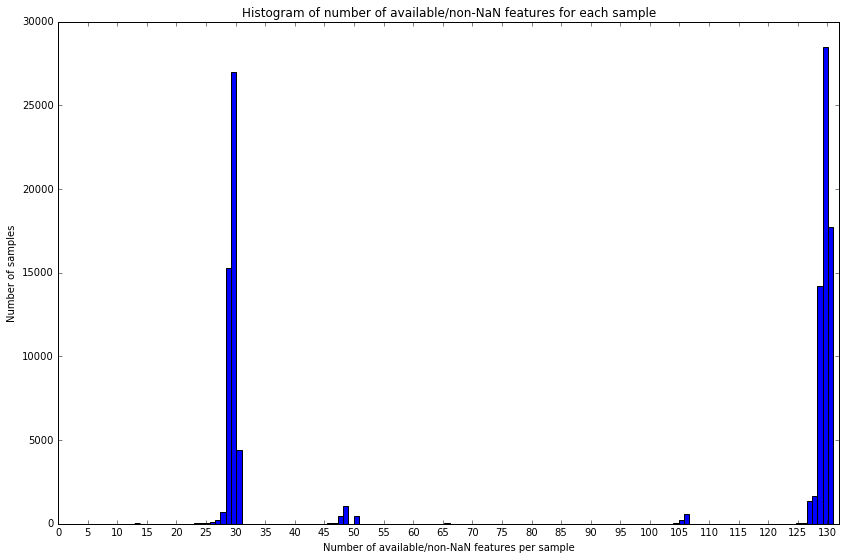

In [13]:
import matplotlib.ticker as ticker
tick_spacing = 5
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(trsetsum['TotalFeatures'],bins=131)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(0,132)
plt.title('Histogram of number of available/non-NaN features for each sample')
plt.xlabel('Number of available/non-NaN features per sample')
plt.ylabel('Number of samples')
plt.show()

This is a very intriguing histogram. Some key takeaways:
1. The number of non-NaN features per sample is tightly clustered around the 25-30 features and 125-130 features regions
2. The number of samples with features not in these two regions is extremely small (we will quantify this in a moment)

Let us focus our attention first on the samples that have between 27 and 31 features. Let's plot the histogram of only these samples:

In [14]:
trsetsum27_31 = pd.DataFrame(trsetsum[(trsetsum['TotalFeatures']>26) & (trsetsum['TotalFeatures']<32)])

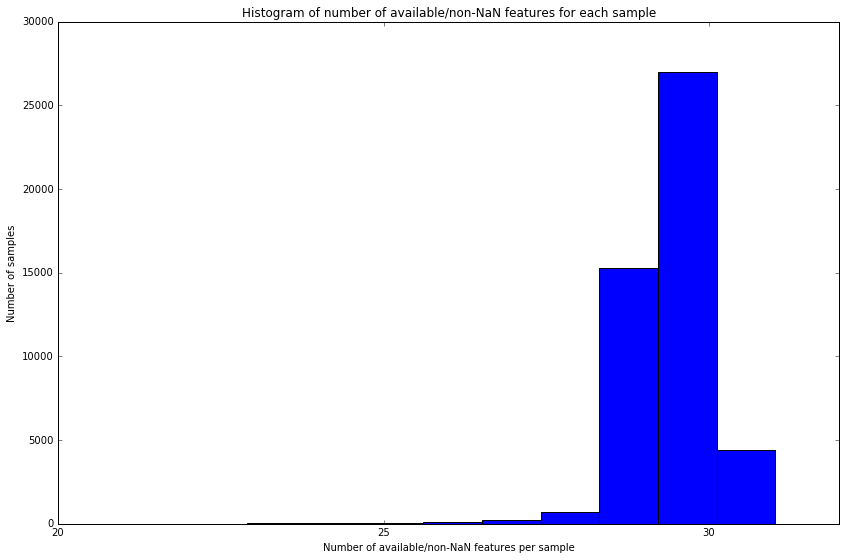

In [15]:
import matplotlib.ticker as ticker
tick_spacing = 5
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(trsetsum['TotalFeatures'],bins=131)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(20,32)
plt.title('Histogram of number of available/non-NaN features for each sample')
plt.xlabel('Number of available/non-NaN features per sample')
plt.ylabel('Number of samples')
plt.show()

This snapshot clarifies why we have chosen our subset of interest to be the set of samples that have between 27 and 31 features. Let's find out what percentage of this subset of samples is classified as 1:

In [16]:
trsetsum27_31.target.sum()/trsetsum27_31.ID.count()

0.77115829304183314

So, 77.1% of all samples in this subset are 1s. We can do a similar thing for the samples that make up the tower on the right of our original histogram:

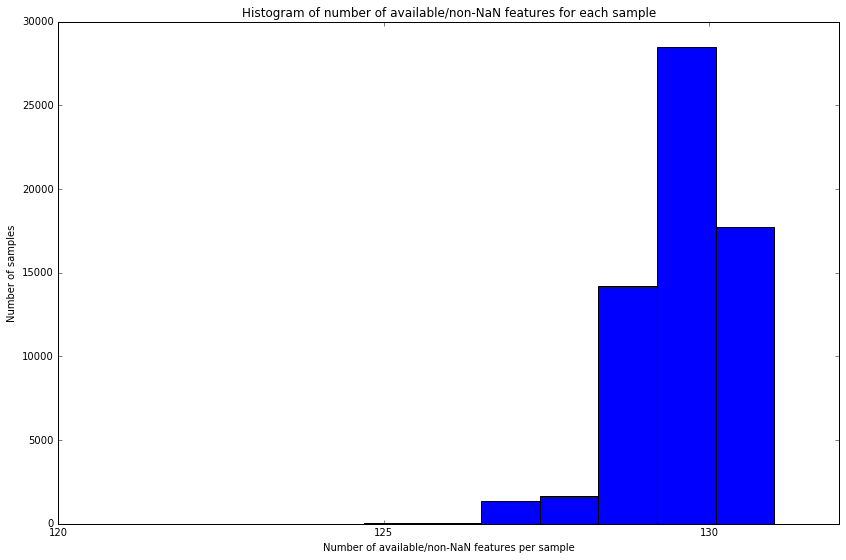

63490

In [17]:
trsetsum127_131 = trsetsum[(trsetsum['TotalFeatures']>126) & (trsetsum['TotalFeatures']<132)]

import matplotlib.ticker as ticker
tick_spacing = 5
fig, ax = plt.subplots(figsize=(14,9))

ax.hist(trsetsum['TotalFeatures'],bins=131)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(120,132)
plt.title('Histogram of number of available/non-NaN features for each sample')
plt.xlabel('Number of available/non-NaN features per sample')
plt.ylabel('Number of samples')
plt.show()
trsetsum127_131.ID.count()

In [18]:
trsetsum127_131.target.sum()/trsetsum127_131.ID.count()

0.75397700425263825

This subset has 75.4% of the samples as 1s.

Earlier we had seen that 76.12% of the total training set was classified as 1, which is in between 75.4% and 77.1% for the two subsets.

Visually, it seems that we have captured a majority of the data in our two subsets of 27-31 and 127-131 available features. Let's calculate the percentage of samples in these two subsets combined:

In [19]:
(trsetsum27_31.ID.count()+trsetsum127_131.ID.count())/trset.ID.count()

0.97147505707612769

These two sets comprise 97.15% of the total dataset

A potential benefit of working with these two subsets could be that overall sparsity is reduced. This will happen when the samples in the 27-31 subset are ALL missing the same features. If this is the case, then we may drop those features for this subset altogether and just work with a reduced set of features.

We may express this scenario as:

Subset_27-31: 

Each feature in the set {F1, F2, F3,....,F30, F31} is available for at least one sample, 

Each feature in {F32, F33,....., F130, F131} is NaN for ALL samples

Subset_127-131: 

Each feature in the set {F1, F2, F3,....,F130, F131} is available for at least one sample.

In order to find out whether our subsets are actually divided along these lines, let's compute the count of features that have non-Null values for any non-zero number of samples in the 27-31 set. If we find that this number is equal to 31, then we have confirmed our hunch. 

In [20]:
count=0;
toremove = list([])
tokeep = list([])
for label in trsetsum27_31.columns.values:
    if trsetsum27_31[label].notnull().sum()==0:
        count+=1
        toremove = toremove + [str(label)]
    else:
        tokeep = tokeep +[str(label)]
            
print(131-count) #Removing ID, Target and TotalFeatures

31


This confirms our suspicion that the 27-31 subset has the same set of common missing and present features. At the same time we have also collected the features that are completely absent in this subset in the list 'toremove'.

Now, let's calculate the sparsity of our two subsets. We expect that it will be an improvement on the 34% that we saw previously.

In [21]:
toremove = toremove + ['ID','target']
trset_Xs = trsetsum27_31.drop(toremove, axis=1)
trsetNaNnumS = trset_Xs.notnull()
trsetNaNnumS.astype(int)
trsetNaNnumS['TotalFeatures']=trsetNaNnumS.sum(axis=1)
trsetNaNnumS['ID'] = trsetsum27_31['ID']
trsetNaNnumS = trsetNaNnumS[['TotalFeatures','ID']]

1 - trsetNaNnumS.TotalFeatures.sum()/(trset_Xs.shape[0]*trset_Xs.shape[1])

0.03973026592390161

Now, our smaller subset is only 3.9% sparse. 

In [22]:
trset_Xl = trsetsum127_131.drop(['ID','target'], axis=1)
trsetNaNnumL = trset_Xl.notnull()
trsetNaNnumL.astype(int)
trsetNaNnumL['TotalFeatures']=trsetNaNnumL.sum(axis=1)
trsetNaNnumL['ID'] = trsetsum127_131['ID']
trsetNaNnumL = trsetNaNnumL[['TotalFeatures','ID']]

1 - trsetNaNnumL.TotalFeatures.sum()/(trset_Xl.shape[0]*trset_Xl.shape[1])

0.008045170558952264

Remarkably, our 127-131 subset is even less sparse - 0.8%

At this point, let's convert our 27-31 subset to have only the non-NaN features.

In [23]:
trsetsum27_31 = trsetsum27_31[tokeep]
trsetsum27_31

,ID,target,v3,v10,v12,v14,v21,v22,v24,v30,...,v79,v91,v107,v110,v112,v113,v114,v125,v129,TotalFeatures
88669,177060,1,C,1.838075e+00,7.105565,13.105813,8.007531,PFV,E,C,...,C,A,E,A,A,P,14.086140,W,0,31
12765,25576,1,C,1.991246e+00,6.231276,12.419565,7.163703,QJ,E,C,...,M,F,A,A,P,T,17.938847,P,0,31
19720,39489,1,C,1.006565e+00,6.309066,11.409571,6.865428,UPB,E,C,...,C,B,B,A,H,G,12.105075,AI,0,31
19729,39512,1,C,5.229759e+00,8.336645,14.347483,8.134341,YYU,D,C,...,B,F,A,B,S,AC,15.539274,AE,2,31
38276,76569,1,C,1.028446e+00,6.196312,12.148606,7.467185,KOX,E,C,...,B,A,E,B,T,F,15.676546,BU,0,31
10,24,1,C,1.312910e+00,6.527708,12.670870,7.824360,GEH,E,D,...,C,F,A,A,F,X,9.140132,AR,0,31
32011,64202,0,C,1.050327e+00,6.659046,11.636386,6.971915,RSR,C,G,...,C,C,D,A,H,V,14.189759,AJ,0,31
47279,94465,1,C,5.251639e-01,6.293434,10.478942,6.712961,AGHQ,E,C,...,C,G,C,A,H,M,18.077554,CD,0,31
72930,145522,1,C,2.516411e+00,7.246821,10.987261,5.367151,EBH,E,D,...,C,F,A,A,T,AB,14.942702,BU,0,31
88813,177386,1,C,1.050329e+00,6.566650,12.573678,7.899773,MDU,E,C,...,C,B,B,A,T,AC,13.083086,CB,0,31


In [24]:
trsetsum27_31.shape

(47570, 34)

We note that although we have split the training data for our convenience, we have not looked at the test data to confirm whether this makes sense. If our test data is distributed very differently from the training data, this approach will not work well.

Let us confirm that the test data is also substantively represented by the same selection of features.

In [25]:
tset = pd.read_csv("test.csv")

tset_X = tset.drop(['ID'], axis=1)

In [26]:
tsetNaNnum = tset_X.notnull()
tsetNaNnum.astype(int)
tsetNaNnum['TotalFeatures']=tsetNaNnum.sum(axis=1)
tsetNaNnum['ID'] = tset['ID']
tsetNaNnum.sort_values(by='TotalFeatures',ascending=False)
tsetNaNnum = tsetNaNnum[['TotalFeatures','ID']]


In [27]:
tsetsum = pd.merge(tset,tsetNaNnum)
tsetsum = tsetsum.sort_values(by='TotalFeatures',ascending=False)


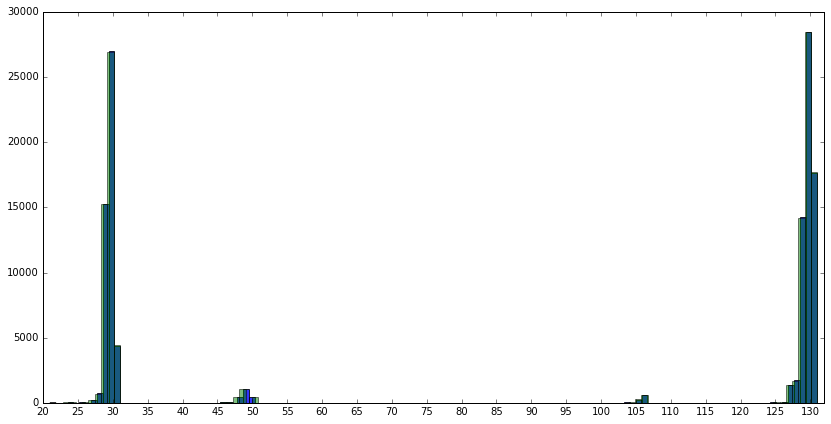

In [28]:
import matplotlib.ticker as ticker
tick_spacing = 5
fig, ax = plt.subplots(figsize=(14,7))

ax.hist(tsetsum['TotalFeatures'],bins=131,alpha=0.8)
ax.hist(trsetsum['TotalFeatures'],bins=131,alpha=0.5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(20,132)
plt.show()

This shows that the distribution is remarkably similar and that our method of splitting the training data would fit the test data well. The training and test data are very similar in terms of the distribution of features across samples.

In [29]:
tsetsum27_31 = tsetsum[(tsetsum['TotalFeatures']>26) & (tsetsum['TotalFeatures']<32)]
tsetsum127_131 = tsetsum[(tsetsum['TotalFeatures']>126) & (tsetsum['TotalFeatures']<132)]


In [30]:
(tsetsum27_31.ID.count()+tsetsum127_131.ID.count())/tset.ID.count()

0.97148426914234265

In [31]:
(trsetsum27_31.ID.count()+trsetsum127_131.ID.count())/trset.ID.count()

0.97147505707612769

This shows that in both cases, splitting the datasets would cover the exact same percentage of total samples - 97.15%

Having split the dataset into two non-sparse subsets, let's move forward and get a better understanding of the types of features. We have already been told that there are numerical and categorical variables, and that the categorical variables are not ordinal - meaning that they are not in a particular order.

I'd like to separate the categorical features from the numerical ones. I will use the fact that means are only calculated for numerical features.

In [32]:
trset_means = trset.mean()


In [33]:
trset_meandf = trset_means.to_frame()

#trset_meandf.reset_index()
#trset_meandf.columns=['numvars','values']
catlabels = ['target'];
alllabels = list(trset.columns.values)
numlabels = list(trset_meandf.index.values)
for label in alllabels:
    if label not in numlabels:
        #print(label)
        catlabels.append(label)
print(catlabels)
len(catlabels)-1

['target', 'v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


19

We have 19 categorical variables (excluding target, which is not a feature)

Let's check if all 19 categorical variables are represented in the 27-31 subset:

In [34]:
count=0
for label in trsetsum27_31.columns:
    if label  in catlabels:
        count+=1
        
print(count-1, 'categorical variables are present in 27-31 subset')    

19 categorical variables are present in 27-31 subset


This implies that 19 categorical and 12 numerical variables are present in the 27-31 subset.

Let's recap what we know about the derived data that we have generated:

Original dataset:

114321 rows, 131 features, 34% sparse, 76.1% samples are 1s

Derived datasets:

27-31 subset: 47570 rows (41.6% of total), 31 features (19 cat, 12 num), 3.9% sparse, 77.1% samples are 1s

127-131 subset: 63490 rows (55.5% of total), 131 features (19 cat, 112 num), 0.8% sparse, 75.4% samples are 1s.

Together these subsets account for 97.15% of the original dataset (number of samples)


Now, let's begin to look at the values that these variables take. We can start by taking a glance at the 27-31 subset's categorical data:

In [35]:
trsetsum27_31[catlabels]

,target,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
88669,1,C,PFV,E,C,A,I,A,CN,B,F,B,D,C,A,E,A,A,P,W
12765,1,C,QJ,E,C,A,G,J,DL,C,F,B,D,M,F,A,A,P,T,P
19720,1,C,UPB,E,C,A,I,H,CY,A,F,B,D,C,B,B,A,H,G,AI
19729,1,C,YYU,D,C,B,C,D,DI,A,F,B,D,B,F,A,B,S,AC,AE
38276,1,C,KOX,E,C,A,C,D,AW,A,B,B,B,B,A,E,B,T,F,BU
10,1,C,GEH,E,D,A,I,E,CY,A,F,B,D,C,F,A,A,F,X,AR
32011,0,C,RSR,C,G,A,I,H,P,B,F,B,D,C,C,D,A,H,V,AJ
47279,1,C,AGHQ,E,C,A,I,A,DP,C,F,B,D,C,G,C,A,H,M,CD
72930,1,C,EBH,E,D,A,I,C,BJ,A,C,B,B,C,F,A,A,T,AB,BU
88813,1,C,MDU,E,C,A,I,G,BW,C,F,B,D,C,B,B,A,T,AC,CB


Some of these variables appear to have small number of unique values, while other are much more diverse. Let's calculate the number of unique values for each categorical variable:

In [36]:
for label in catlabels:
    print(label, len(trsetsum27_31[label].unique()))

target 2
v3 4
v22 11934
v24 5
v30 8
v31 4
v47 9
v52 12
v56 108
v66 3
v71 5
v74 3
v75 4
v79 18
v91 7
v107 7
v110 3
v112 23
v113 37
v125 91


This table tells us that while most of the variables have 100 or less unique values among ~47000 samples, v22 stands out from the pack with almost 12000 unique values.

The next question that comes to mind is if these unique values account for the total number of unique values of v22 in the original dataset. Let's find out:

In [37]:
print('LABEL', '\t27-31','\t127-131','Total')
for label in catlabels:
    print(label, '\t',len(trsetsum27_31[label].unique()),'\t',len(trsetsum127_131[label].unique()),'\t',len(trset[label].unique()))

LABEL 	27-31 	127-131 Total
target 	 2 	 2 	 2
v3 	 4 	 4 	 4
v22 	 11934 	 13332 	 18211
v24 	 5 	 5 	 5
v30 	 8 	 8 	 8
v31 	 4 	 4 	 4
v47 	 9 	 9 	 10
v52 	 12 	 12 	 13
v56 	 108 	 115 	 123
v66 	 3 	 3 	 3
v71 	 5 	 6 	 9
v74 	 3 	 3 	 3
v75 	 4 	 3 	 4
v79 	 18 	 17 	 18
v91 	 7 	 7 	 8
v107 	 7 	 7 	 8
v110 	 3 	 3 	 3
v112 	 23 	 23 	 23
v113 	 37 	 35 	 37
v125 	 91 	 90 	 91


This shows us that there are over 18000 unique values of v22. 

For use in machine learning algorithms, categorical variables are converted to numerical variables via a process called one-hot encoding. This simply refers to splitting the set of N unique values for a categorical variable into N vectors of size Nx1, each of which has all values equal to zero, except one which is set to 1. 

This is similar to writing the vector {a, b, c} as a linear combination of {a, 0, 0}, {0, b, 0} and {0, 0, c}.

This ends up creating N new variables for each categorical variable with N uniques. We normally drop one of the N new variables since the Nth variable is a linear combination of the other N-1 for a finite set of uniques.

Clearly, this increases the amount of processing the model has to do if the number of uniques is very large, as is the case of v22.

Changing the names of our subsets to trsmall and trlarge:

In [38]:
trsmall = trsetsum27_31
trsmall = trsmall.drop(['TotalFeatures'],axis=1)
trsmall

,ID,target,v3,v10,v12,v14,v21,v22,v24,v30,...,v75,v79,v91,v107,v110,v112,v113,v114,v125,v129
88669,177060,1,C,1.838075e+00,7.105565,13.105813,8.007531,PFV,E,C,...,D,C,A,E,A,A,P,14.086140,W,0
12765,25576,1,C,1.991246e+00,6.231276,12.419565,7.163703,QJ,E,C,...,D,M,F,A,A,P,T,17.938847,P,0
19720,39489,1,C,1.006565e+00,6.309066,11.409571,6.865428,UPB,E,C,...,D,C,B,B,A,H,G,12.105075,AI,0
19729,39512,1,C,5.229759e+00,8.336645,14.347483,8.134341,YYU,D,C,...,D,B,F,A,B,S,AC,15.539274,AE,2
38276,76569,1,C,1.028446e+00,6.196312,12.148606,7.467185,KOX,E,C,...,B,B,A,E,B,T,F,15.676546,BU,0
10,24,1,C,1.312910e+00,6.527708,12.670870,7.824360,GEH,E,D,...,D,C,F,A,A,F,X,9.140132,AR,0
32011,64202,0,C,1.050327e+00,6.659046,11.636386,6.971915,RSR,C,G,...,D,C,C,D,A,H,V,14.189759,AJ,0
47279,94465,1,C,5.251639e-01,6.293434,10.478942,6.712961,AGHQ,E,C,...,D,C,G,C,A,H,M,18.077554,CD,0
72930,145522,1,C,2.516411e+00,7.246821,10.987261,5.367151,EBH,E,D,...,B,C,F,A,A,T,AB,14.942702,BU,0
88813,177386,1,C,1.050329e+00,6.566650,12.573678,7.899773,MDU,E,C,...,D,C,B,B,A,T,AC,13.083086,CB,0


In [39]:
trlarge = trsetsum127_131
trlarge = trlarge.drop(['TotalFeatures'],axis=1)
trlarge

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
18494,37033,1,2.544857e+00,8.886302,C,4.978156,8.422371,2.033492,2.488039,4.557424,...,5.785123,3.086521,2.977296e+00,K,1.526933,3.027810,1.516576,0,1.701923,2.598870e+00
20271,40593,1,1.219398e+00,7.593828,C,3.575840,6.980498,2.071563,2.514124,0.089902,...,5.040651,2.934009,8.987969e-03,BM,1.667445,3.019068,1.273173,0,2.531835,8.284022e-01
20287,40624,0,7.708331e-01,6.174703,C,3.550725,8.958954,1.850001,2.241666,0.360917,...,5.924050,3.845692,5.879767e-02,BM,1.828769,1.625000,1.663707,0,2.884758,5.154638e-01
72203,144068,1,1.800486e+00,6.228345,C,2.803366,6.363956,1.751824,2.618005,0.249754,...,5.524476,4.334267,5.374241e-02,BM,1.956043,3.175183,0.799320,0,2.319702,1.282052e+00
72204,144070,1,7.663482e-07,10.152567,C,4.881020,11.143241,2.898550,3.623188,0.004700,...,2.500000,1.563375,2.033031e-02,P,2.204283,1.086956,5.609453,0,0.640001,-5.245674e-07
20280,40613,0,8.897786e-01,11.945232,C,5.136177,10.225986,2.725452,3.046092,0.305836,...,7.220448,1.071136,4.566392e-01,A,1.950725,1.893787,2.962654,0,0.515790,2.448979e+00
72209,144077,0,2.334386e+00,7.503317,C,3.495485,8.157364,2.026814,2.381704,0.203609,...,7.062937,4.311789,3.611457e-02,A,1.636450,3.593257,1.420720,0,2.145695,1.975309e+00
72215,144087,1,1.907217e+00,8.624481,C,4.342458,7.155346,1.649485,2.989691,0.008089,...,8.000000,2.287296,-4.694559e-08,CJ,1.119997,2.899485,1.692686,0,1.103448,2.500000e+00
72218,144094,0,2.012799e+00,8.061974,C,4.568832,10.266293,3.379200,2.688000,0.485485,...,10.045454,3.128863,4.779001e-01,CG,1.293246,1.476000,2.969759,0,1.561904,2.073170e+00
20274,40597,0,9.215440e-01,9.981734,C,4.802485,7.383994,2.141968,1.867995,0.032047,...,8.333333,1.974583,7.689809e-02,V,1.461156,2.942093,1.783249,0,1.333334,1.600000e+00


Let's return to the unique values of v22 and see if we can find something of interest in them. Here we first extract the list of unique values and display them in alphabetical order:

In [83]:
v22uniques = pd.DataFrame(trset['v22'].unique())
v22uniques.reset_index()
v22uniques.columns=['name']
v22uniques_sorted = v22uniques.sort_values(by='name')
v22uniques_sorted

,name
1766,AA
4830,AAA
4843,AAAA
1952,AAAB
10650,AAAC
16595,AAAE
15408,AAAF
8909,AAAG
12225,AAAH
935,AAAK


In [60]:
v22uniques.count()

name    18210
dtype: int64

There is a hint of a sequence here, because of the alphabetical order. However, we have been informed by the organizers that none of the categorical variables is ordinal. 

In [211]:
print('LABEL', 'Total')
for label in numlabels:
    print(label, '\t',len(trset[label].unique()))

LABEL Total
ID 	 114321
target 	 2
v1 	 64488
v2 	 64525
v4 	 64525
v5 	 65672
v6 	 64488
v7 	 64490
v8 	 65689
v9 	 64452
v10 	 112486
v11 	 64478
v12 	 114234
v13 	 64489
v14 	 110473
v15 	 64482
v16 	 64415
v17 	 64526
v18 	 64490
v19 	 64479
v20 	 64470
v21 	 113710
v23 	 63639
v25 	 65680
v26 	 64490
v27 	 64490
v28 	 64483
v29 	 64488
v32 	 64489
v33 	 64490
v34 	 114210
v35 	 64490
v36 	 65610
v37 	 64475
v38 	 12
v39 	 64485
v40 	 114193
v41 	 64489
v42 	 64473
v43 	 64485
v44 	 64521
v45 	 64487
v46 	 65698
v48 	 64520
v49 	 64488
v50 	 114225
v51 	 63638
v53 	 64470
v54 	 65695
v55 	 64489
v57 	 64489
v58 	 64483
v59 	 64525
v60 	 64489
v61 	 64520
v62 	 8
v63 	 65682
v64 	 64525
v65 	 64473
v67 	 64488
v68 	 64475
v69 	 64333
v70 	 65632
v72 	 13
v73 	 64485
v76 	 64526
v77 	 64490
v78 	 64266
v80 	 64467
v81 	 65686
v82 	 65664
v83 	 64490
v84 	 64488
v85 	 63638
v86 	 64490
v87 	 65631
v88 	 64490
v89 	 65687
v90 	 64485
v92 	 64479
v93 	 64490
v94 	 64490
v95 	 64479
v96 

Until this point, we had considered the smallest set of predictors that appear in all samples of our subset.


But we can change the question now to ask - Which predictors appear in ALL of the samples in the subset? 

A potentially more interesting version of this question is - How many NaN values do each of the predictors have? Clearly if a variable has zero NaN values in the subset, then it is present in all samples.

We will find the features that have >0 null elements.

In [40]:
trimlist_S = []

for label in trsmall.columns.values:
    list1 = trsmall[label]

    if list1.isnull().sum()>0:
        trimlist_S.extend([label])
        print(label, list1.isnull().sum())


v3 532
v21 207
v22 227
v30 35125
v31 532
v56 3151
v112 226
v113 20458
v125 21


In [41]:
print(trimlist_S)
len(trimlist_S)

['v3', 'v21', 'v22', 'v30', 'v31', 'v56', 'v112', 'v113', 'v125']


9

This shows us that v30 and v113 have ~35000 (73.8%) and ~20500 (43.0%) null values among ~47000 samples. We can also infer that 22 of the 31 features have zero NaNs, or that they are available for every sample.

In [42]:
trimlist_L = []

for label in trlarge.columns.values:
    list1 = trlarge[label]
    if list1.isnull().sum()>0:
        print(label, list1.isnull().sum())
        trimlist_L.extend([label])

v3 2746
v9 1
v21 303
v22 219
v30 23680
v31 2746
v56 3448
v70 1
v80 1
v87 24
v98 18
v102 606
v105 24
v112 52
v113 33548
v122 1
v125 6


In [43]:
print(trimlist_L)
len(trimlist_L)

['v3', 'v9', 'v21', 'v22', 'v30', 'v31', 'v56', 'v70', 'v80', 'v87', 'v98', 'v102', 'v105', 'v112', 'v113', 'v122', 'v125']


17

Similarly for our trlarge subset, v30 and v113 have ~23700 (37.3%) and ~33500 (52.8%) NaN values among ~63500 samples. We also note that 114 features are present in all samples.

We note that v9, v70, v80 and v122 are null only once each. We check if they are all null for the same sample.

In [44]:
trl_v70null = trlarge[trlarge['v70'].isnull()]

print(trl_v70null.v9)
print(trl_v70null.v80)
print(trl_v70null.v122)


34887    10.000001
Name: v9, dtype: float64
34887    3.333333
Name: v80, dtype: float64
34887    6.666667
Name: v122, dtype: float64


We find that that is not the case.

In [45]:
trl_v80null = trlarge[trlarge['v80'].isnull()]

print(trl_v80null.v9)
print(trl_v80null.v70)
print(trl_v80null.v122)
print(trl_v80null.ID)


109881   NaN
Name: v9, dtype: float64
109881    11.678001
Name: v70, dtype: float64
109881   NaN
Name: v122, dtype: float64
109881    219760
Name: ID, dtype: int64


However, we do find that v80, v9 and v122 are null for ID 219760. We will drop this row from trlarge.

In [46]:
trlarge = trlarge[trlarge.ID != 219760]

trimlist_L = []

for label in trlarge.columns.values:
    list1 = trlarge[label]
    if list1.isnull().sum()>0:
        print(label, list1.isnull().sum())
        trimlist_L.extend([label])

print(trimlist_L)
len(trimlist_L)

v3 2746
v21 303
v22 219
v30 23680
v31 2746
v56 3448
v70 1
v87 24
v98 17
v102 606
v105 24
v112 52
v113 33548
v125 6
['v3', 'v21', 'v22', 'v30', 'v31', 'v56', 'v70', 'v87', 'v98', 'v102', 'v105', 'v112', 'v113', 'v125']


14

Now, we have 63489 samples, and 117 features are present in all samples in this subset.

At this point, we can consider using two classifiers for the two training data subsets. 



CHOICE OF CLASSIFIER

I will be using the XGBoost classifier for this project. XGBoost stands for Extreme Gradient Boosting, which is a version of a gradient boosting method for trees. In particular, it has found widespread applications in ML competitions. It works very well with sparse data, and does not require imputation of missing data. 

Also, when I started the project, a quick survey of the forums revealed that XGBoost was the preferred algorithm for the challenge. Therefore, I'm also going to use it here.

Here, I import the packages required to run XGBoost and to do a grid search for optimal parameters.

In [47]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV



I adapted with minor modifications the following function used in the tutorial at https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

This function takes as argument an XGBClassifier object (for binary classification), number of folds for cross validation, and a criterion for stopping further iterations.

It then does a cross validation (in the case below, a 5-fold CV) and returns the model accuracy and area under the ROC curve. For the competition, the metric used to evaluate the model is logloss, which is the criterion selected in this function also.

When the function exits, it returns an ordered array of features in the order of their importance to the classification. It also returns the weights computed by XGBoost in constructing the ensembles of trees, boosting trees that fit the cross-validation data better.

In [48]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[['target']].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds, verbose_eval=7)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='logloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['target'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['target'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return feat_imp

Here, I do some manipulations to configure the inputs to the above function. Most importantly, I am dropping the v22 predictor because of the computational difficulty it poses when used with one-hot encoding. I'm dropping v22 for both trsmall and trlarge.

In [49]:
trsmall_2 = trsmall.drop(['v22'], axis=1)
trlarge_2 = trlarge.drop(['v22'], axis=1)

In [50]:
to_remove = ['v22','target']
newcats2 = list(set(catlabels) - set(to_remove))
print(newcats2)
print(catlabels)

['v56', 'v31', 'v107', 'v3', 'v110', 'v30', 'v24', 'v113', 'v47', 'v91', 'v79', 'v66', 'v112', 'v125', 'v75', 'v74', 'v52', 'v71']
['target', 'v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125']


This is where the one-hot encoding takes place. Note that I have set drop_first=True to drop the Nth dummy variable created for a categorical variable with N uniques.

In [51]:
smalldum2 = pd.get_dummies(trsmall[newcats2], drop_first=True)
largedum2 = pd.get_dummies(trlarge[newcats2], drop_first=True)

In the blocks below, I drop the original categorical variable, after adding the N-1 numerical variables in its place.

In [52]:
trsmall_2_features = pd.concat([trsmall_2,smalldum2],axis=1)
trsmall_2_features = trsmall_2_features.drop(['ID'], axis=1)
for label in newcats2:
    trsmall_2_features = trsmall_2_features.drop(label,axis=1)
    print(label)



v56
v31
v107
v3
v110
v30
v24
v113
v47
v91
v79
v66
v112
v125
v75
v74
v52
v71


In [53]:
trlarge_2_features = pd.concat([trlarge_2,largedum2],axis=1)
trlarge_2_features = trlarge_2_features.drop(['ID'], axis=1)
for label in newcats2:
    trlarge_2_features = trlarge_2_features.drop(label,axis=1)
    print(label)


v56
v31
v107
v3
v110
v30
v24
v113
v47
v91
v79
v66
v112
v125
v75
v74
v52
v71


Here I create an XGBClassifier model with some default parameters. Parameter tuning is an important part of utilizing XGBoost's capabilities.

In [92]:
predictors_small_2 = [x for x in trsmall_2_features.columns if x != 'target']
predictors_large_2 = [x for x in trlarge_2_features.columns if x != 'target']

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

#feat_imp_small_2 = modelfit(xgb1, trsmall_2_features, predictors_small_2)
#feat_imp_large_2 = modelfit(xgb1, trlarge_2_features, predictors_large_2)


This model can now be run using the code above. 

SOME MORE EXPLORATION GUIDED BY XGBOOST RUNS

By using parameter tuning for XGBoost classifiers on the trsmall (27-31 features) and the trlarge (127-131 features), I was able to get a list of the features in both ordered by their importance. 

I had not fully optimized the parameters, but I was curious to see if the important features determined by both classifiers had any interesting trends.

When I inspected the list of important features, it became readily apparent that a set of 8 features ranked very highly in both classifiers.

In [94]:
selectedlabels = ['v50','v12','v21','v40','v10','v114','v14','v34']


These 8 features were the top 8 in the trsmall classifer and they were 8 of the top 14 in the trlarge classifier. I noted that the other 6 features in the top 14 for trlarge were features that were absent in the trsmall list.

I plotted scatter charts of each of the 8 variable against each other. This yields 28 scatter plots. 

Initially, I plotted the entire training set values, which led to figures that were hard to interpret as shown below:


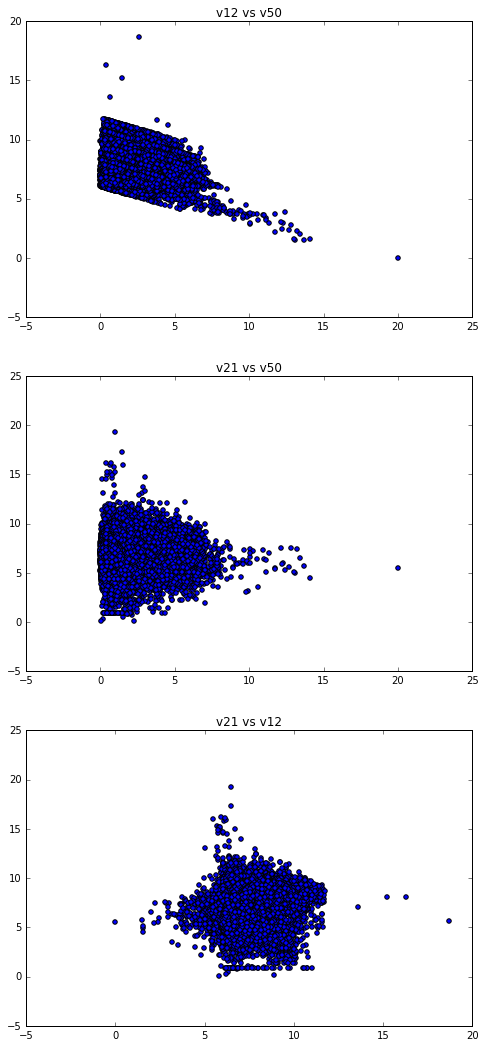

In [103]:
trsets = trset
fig, axes = plt.subplots(3,figsize=(8,18))
count=0
for i in range(0,len(selectedlabels)-5):
    for j in range(i+1,len(selectedlabels)-5):
        #print(count)
        axes[count].scatter(trsets[selectedlabels[i]],trsets[selectedlabels[j]])
        axes[count].set_title(selectedlabels[j]+' vs '+selectedlabels[i])
        count+=1



Therefore, I decided to plot the first 2000 samples from the randomly ordered training set (Please note that there is discussion following the first 28 charts, which dive deeper into some observed effects)

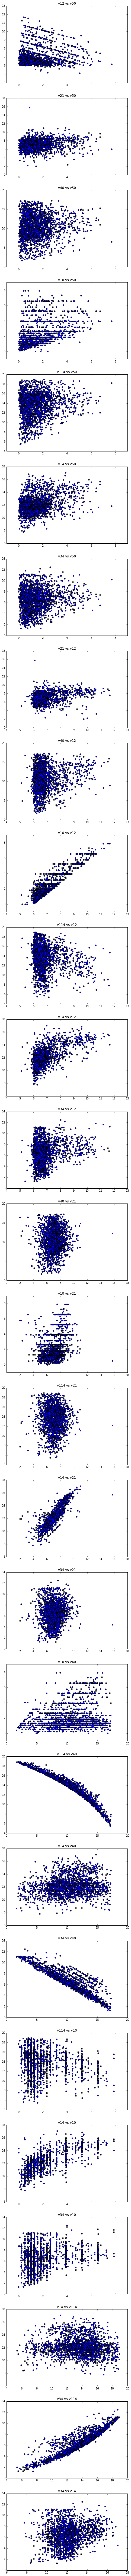

In [102]:
trsets = trset.head(2000)
fig, axes = plt.subplots(28,figsize=(8,170))
count=0
for i in range(0,len(selectedlabels)-1):
    for j in range(i+1,len(selectedlabels)):
        #print(count)
        axes[count].scatter(trsets[selectedlabels[i]],trsets[selectedlabels[j]])
        axes[count].set_title(selectedlabels[j]+' vs '+selectedlabels[i])
        count+=1



Let's review these in more detail. First I'll plot all the scatter charts of v10 with other 7 variables:

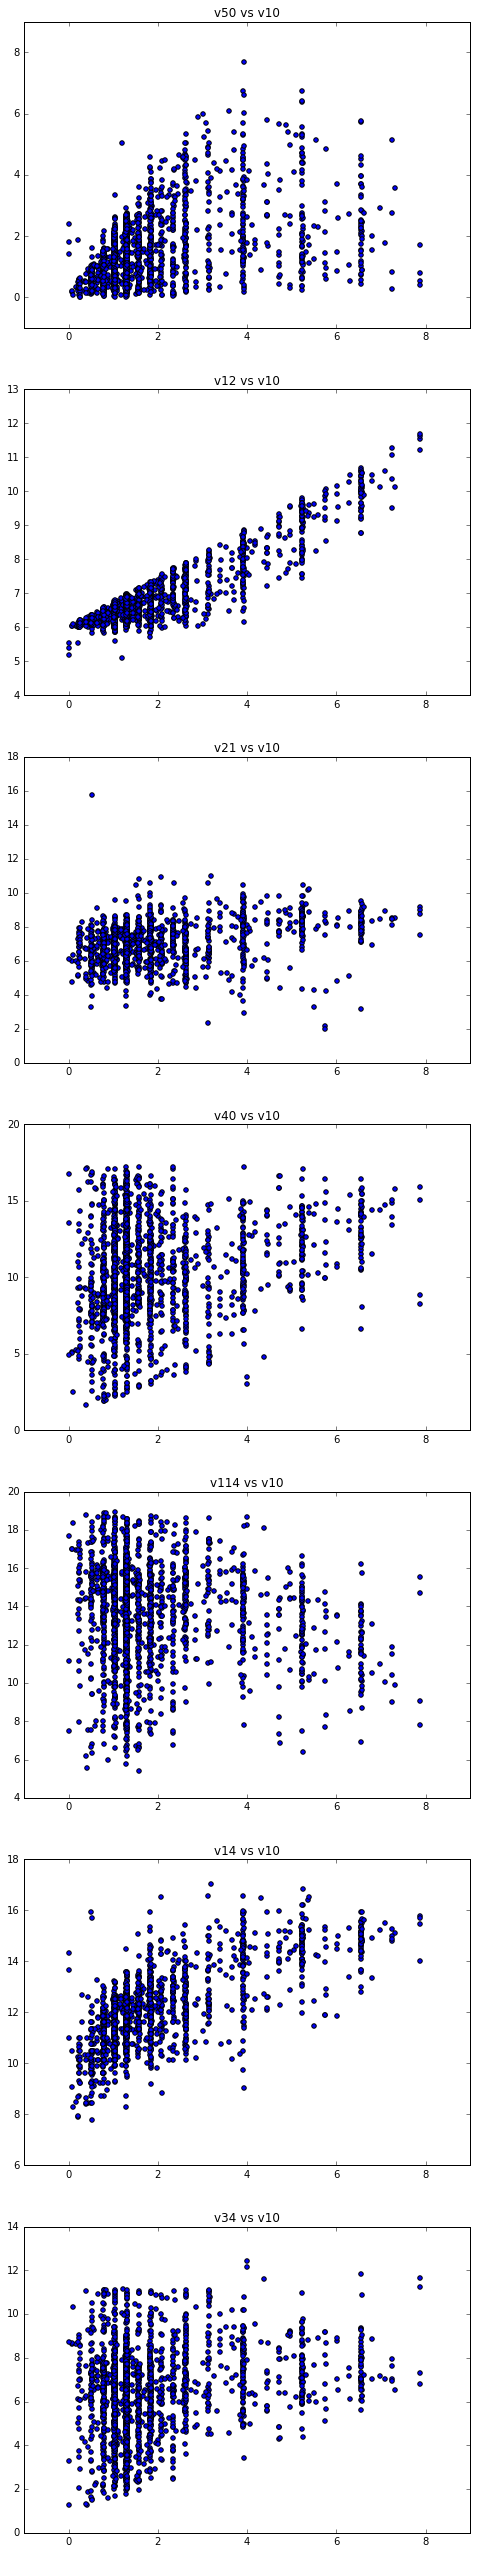

In [105]:
selectedlabels = ['v50','v12','v21','v40','v114','v14','v34']

trsets = trset.head(2000)
fig, axes = plt.subplots(7,figsize=(8,45))
count=0
for i in range(0,len(selectedlabels)):
    axes[count].scatter(trsets['v10'],trsets[selectedlabels[i]])
    axes[count].set_title(selectedlabels[i]+' vs v10')
    count+=1


All of these charts show a similar structure - the variable charted with v10 apepars to take multiple values for the same value of v10. However, as we saw earlier,  

In [107]:
len(trset['v10'].unique())

112486

v10 appears to have approximately as many unique values as the number of samples. However, these charts suggest that there may be clustering of the value around some prominent peaks. Let's see if we can uncover these central values. 


First, I will plot the values of v10 in ascending order.

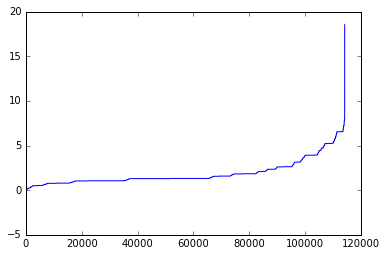

In [119]:
v10sorted = pd.DataFrame(trset['v10'].sort_values())
v10sorted['newindex']=range(0,len(trset['v10']))
plt.plot(v10sorted.newindex,v10sorted.v10)


Let's look at the first 100,000 values, n order to get rid of the vertical line at the right of the chart:

plt.plot(v10sorted.newindex[:100000],v10sorted.v10[:100000])


It appears that we have some data left over. With some trial and error, we arrive at the following chart:

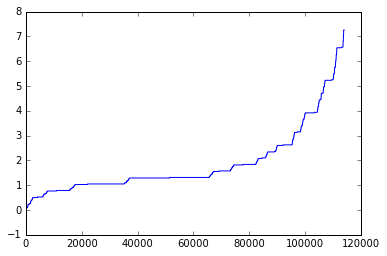

In [126]:
plt.plot(v10sorted.newindex[:114000],v10sorted.v10[:114000])


From these charts it is apparent that v10 is not continuous, but has discrete levels, which appear as almost horizontal lines.

Let us return to the scatter charts. Another subgroup of variables that display strong correlations is ['v40','v114','v34']

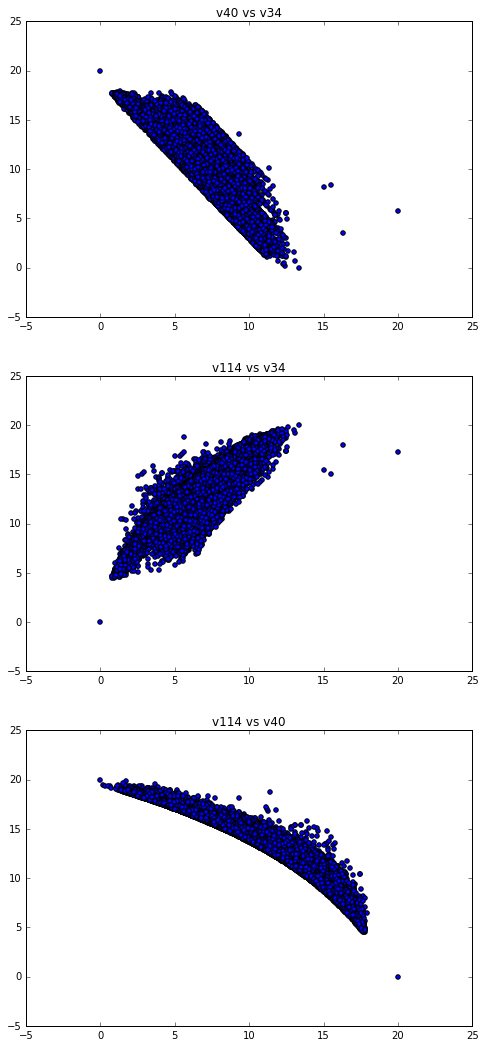

In [129]:
selectedlabels2 = ['v34','v40','v114']
trsets = trset
fig, axes = plt.subplots(3,figsize=(8,18))
count=0
for i in range(0,len(selectedlabels2)-1):
    for j in range(i+1,len(selectedlabels2)):
        #print(count)
        axes[count].scatter(trsets[selectedlabels2[i]],trsets[selectedlabels2[j]])
        axes[count].set_title(selectedlabels2[j]+' vs '+selectedlabels2[i])
        count+=1

For this set of charts, I have plotted the entire training set, but the groupings seem quite prominent.

FInally, v14 and v21 also show correlation:

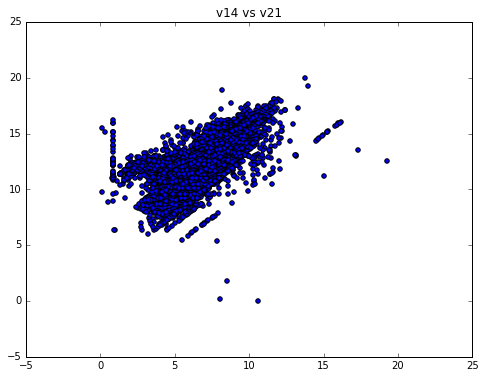

In [139]:
selectedlabels3 = ['v21','v14']
trsets = trset
fig, axes = plt.subplots(1,figsize=(8,6))

axes.scatter(trsets[selectedlabels3[0]],trsets[selectedlabels3[1]])
axes.set_title(selectedlabels3[1]+' vs '+selectedlabels3[0])


Following on from the discovery that v10 has stepped values, I arranged the values of all the numerical variables in ascending order and plotted them to see if there were actually discrete values hidden within the apparently large number of uniques. 

The majority of variables had similar curves, starting near zero, increasing slightly, then continuing to increase at a steady rate, in some cases, ending with a handful of large values. An example (v21) is shown below:

(0, 114710)

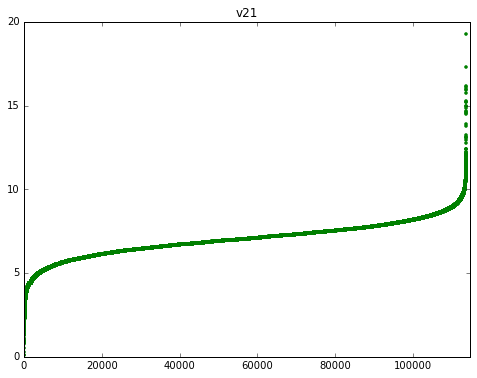

In [203]:
label = 'v21'
series_v21n = trset[trset[label].notnull()][label]
series_v21 = pd.DataFrame(series_v21n.sort_values())
series_v21['newindex']=range(0,len(series_v21n))
fig, axes = plt.subplots(1,figsize=(8,6))

axes.plot(series_v21.newindex,series_v21[label],'.',c='g')
axes.set_title(label)
axes.set_xlim(0,len(series_v21n)+1000)

Now, I have plotted the unusual charts for numerical variables for trsmall:

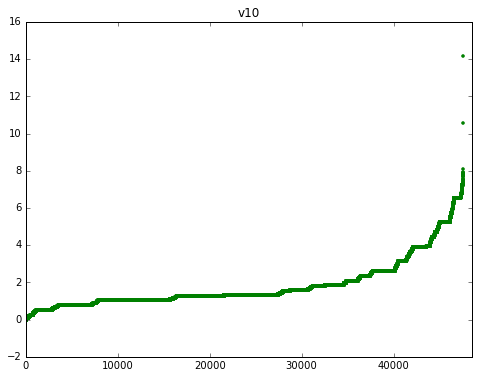

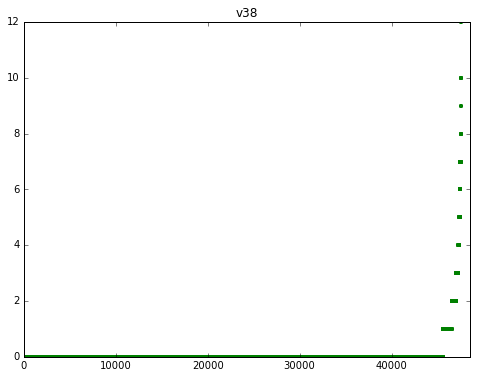

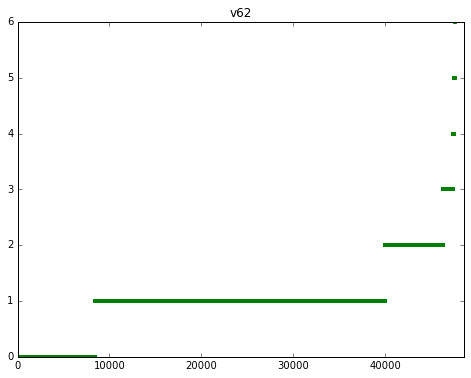

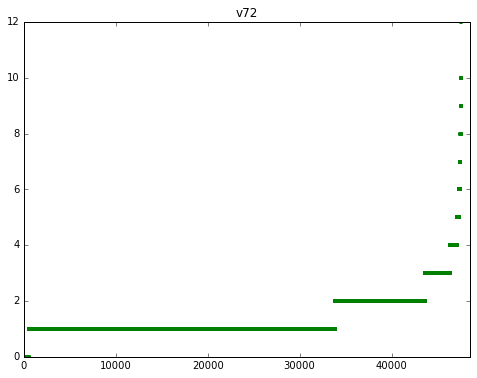

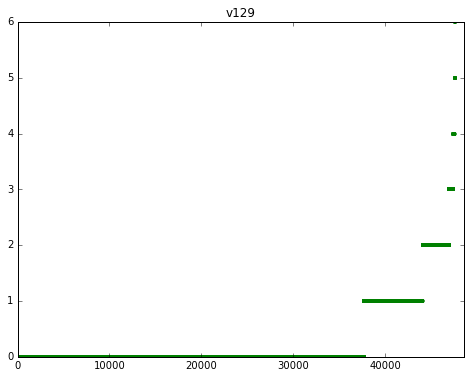

In [205]:
smlb = ['v10','v38','v62','v72','v129']
#smlb=[]
#for lb in trsmall.columns[2:]:
#    if lb in catlabels:
#        ;        
#    else:
#        smlb = smlb + [lb]
            
for label in smlb:
    series_nonanS = trsmall[trsmall[label].notnull()][label]
    seriessortS = pd.DataFrame(series_nonanS.sort_values())
    seriessortS['newindex']=range(0,len(series_nonanS))
    fig, axes = plt.subplots(1,figsize=(8,6))

    axes.plot(seriessortS.newindex,seriessortS[label],'.',c='g')
    axes.set_title(label)
    axes.set_xlim(0,len(series_nonanS)+1000)

Similarly, for trlarge:

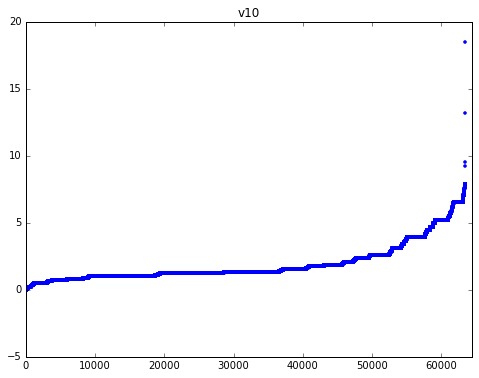

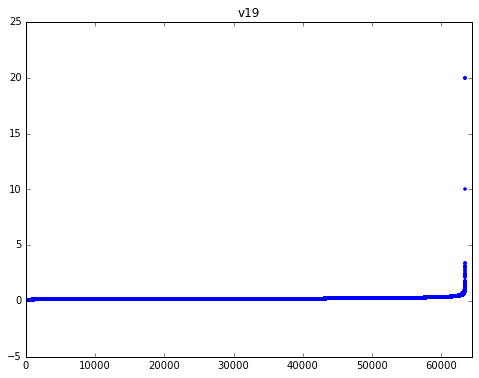

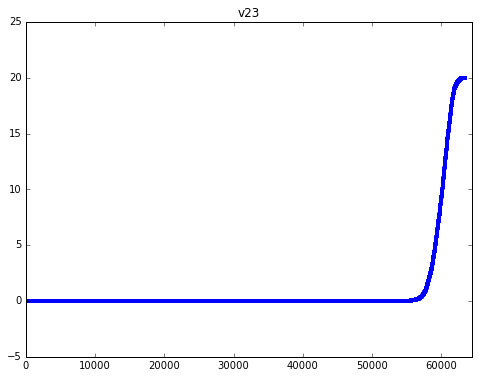

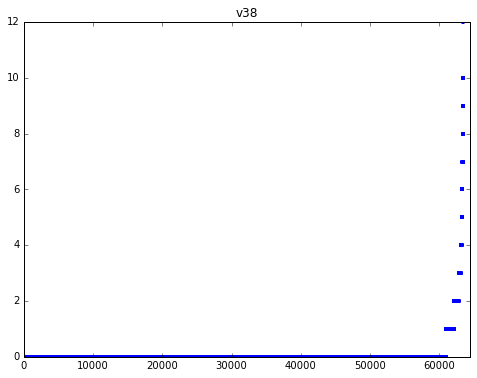

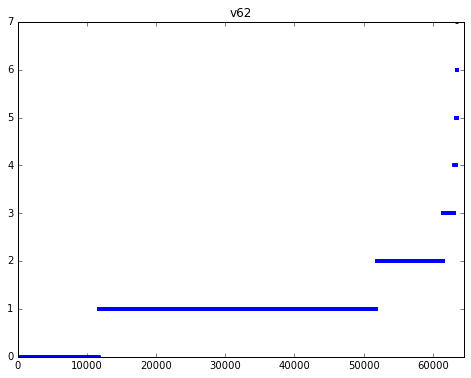

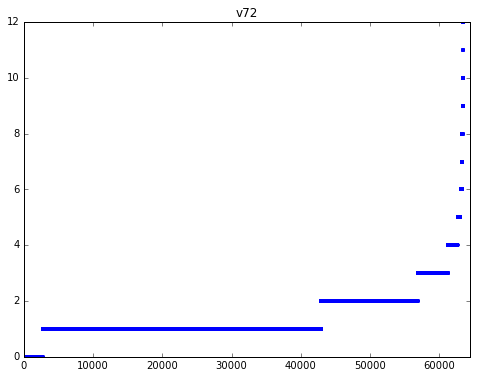

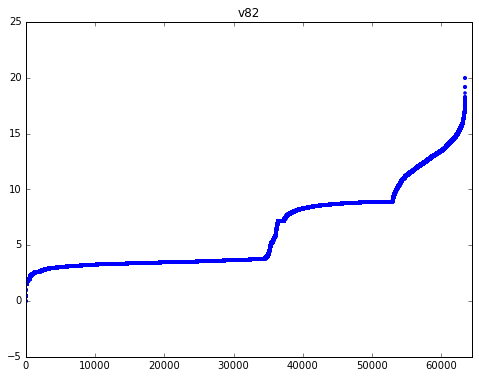

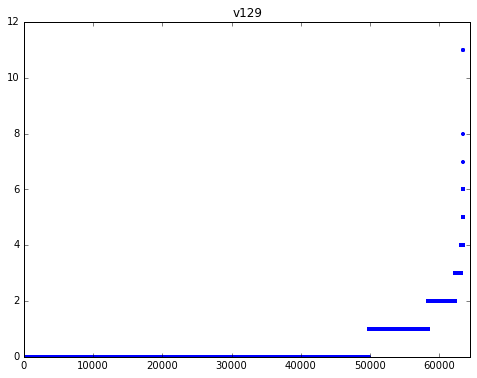

In [206]:
lrlb = ['v10', 'v19','v23','v38','v62','v72','v82','v129']
#lrlb=[]
#for lb in trlarge.columns[2:]:
#    if lb in catlabels:
#        print(lb)        
#    else:
#        lrlb = lrlb + [lb]
            
#n=100
for label in lrlb:
    series_nonanL = trlarge[trlarge[label].notnull()][label]
    seriessortL = pd.DataFrame(series_nonanL.sort_values())
    seriessortL['newindex']=range(0,len(series_nonanL))
    fig, axes = plt.subplots(1,figsize=(8,6))

    axes.plot(seriessortL.newindex,seriessortL[label],'.',c='b')
    axes.set_title(label)
    axes.set_xlim(0,len(series_nonanL)+1000)

Of the above charts, v38, v62, v72 and v129 do not offer new information, since we already knew that they have a small number of integral values. That leaves v10, v19, v23 and v82.